In [1]:
import pandas as pd

df = pd.read_csv("prompt_variations_phi_v1.csv") # pd.read_csv("prompt_variations_phi_v2.csv") # pd.read_csv("prompt_variations_phi.csv") # 
df.query("Move == 'Nf6'")

,Result,WhiteName,BlackName,WhiteElo,BlackElo,IncludeWhiteTitle,IncludeBlackTitle,Move
3,1-0,"Louapre, David",XXX,1000,1000,False,False,Nf6
5,1-0,XXX,"Louapre, David",1000,1000,False,False,Nf6
9,1-0,"Louapre, David",XXX,1400,1400,False,False,Nf6
11,1-0,XXX,"Louapre, David",1400,1400,False,False,Nf6
15,1-0,"Louapre, David",XXX,1700,1700,False,False,Nf6
17,1-0,XXX,"Louapre, David",1700,1700,False,False,Nf6
18,1-0,"Nepomniachtchi, Ian","Louapre, David",1800,1800,False,False,Nf6
21,1-0,"Louapre, David",XXX,1800,1800,False,False,Nf6
23,1-0,XXX,"Louapre, David",1800,1800,False,False,Nf6
39,0-1,"Louapre, David",XXX,1000,1000,False,False,Nf6


In [2]:
# random sample of df
df.sample(20)

,Result,WhiteName,BlackName,WhiteElo,BlackElo,IncludeWhiteTitle,IncludeBlackTitle,Move
50,0-1,"Louapre, David","Nepomniachtchi, Ian",1700,1700,False,False,g6
59,0-1,XXX,"Louapre, David",1800,1800,False,False,Nf6
70,0-1,XXX,"Nepomniachtchi, Ian",2900,2900,False,False,g6
49,0-1,"Nepomniachtchi, Ian",XXX,1700,1700,False,False,g6
14,1-0,"Louapre, David","Nepomniachtchi, Ian",1700,1700,False,False,g6
29,1-0,XXX,"Louapre, David",2000,2000,False,False,g6
22,1-0,XXX,"Nepomniachtchi, Ian",1800,1800,False,False,g6
35,1-0,XXX,"Louapre, David",2900,2900,False,False,g6
55,0-1,"Nepomniachtchi, Ian",XXX,1800,1800,False,False,g6
18,1-0,"Nepomniachtchi, Ian","Louapre, David",1800,1800,False,False,Nf6


In [3]:
df['Result'].unique()

array(['1-0', '0-1'], dtype=object)

In [4]:
len(df)

72

In [5]:
df.query("Move == 'Nf6'")['Result'].value_counts()

0-1    9
1-0    9
Name: Result, dtype: int64

In [6]:
df.query("Move == 'Nf6'")['BlackElo'].value_counts() # White Elo is the same

1800    6
1700    4
1000    4
1400    4
Name: BlackElo, dtype: int64

In [7]:
df.query("Move == 'Nf6'")['BlackName'].value_counts()

Louapre, David    10
XXX                8
Name: BlackName, dtype: int64

In [8]:
df.query("Move == 'Nf6'")['WhiteName'].value_counts()

XXX                    8
Louapre, David         8
Nepomniachtchi, Ian    2
Name: WhiteName, dtype: int64

In [9]:
## Petite note:
# j'ai remarqué que jusqu'à 1800 Elo, sa sensibilité au prompt est un peu bizarre. 
# Par exemple avec "1-0" (Blanc gagne) il joue le coup correct g6. Mais avec "0-1" (Noir gagne) ou "1/2-1/2", il joue Nf6 (ce qui est illogique vu que Nf6 fait justement perdre les Noirs).
# https://twitter.com/MonsieurPhi/status/1781260337754366265
# Mais il n'a plus ce comportement bizarre quand le Elo dépasse 2000. Enfin bref ! Il faudrait faire d'autres tests pour déterminer à quel point cette information sur le niveau Elo influence son niveau de jeu, mais c'est déjà intéressant comme petite expérience.


In [10]:
# jusqu'à 1800 Elo, sa sensibilité au prompt est un peu bizarre. 
df.query("Move == 'Nf6' and BlackElo <= 1800")

,Result,WhiteName,BlackName,WhiteElo,BlackElo,IncludeWhiteTitle,IncludeBlackTitle,Move
3,1-0,"Louapre, David",XXX,1000,1000,False,False,Nf6
5,1-0,XXX,"Louapre, David",1000,1000,False,False,Nf6
9,1-0,"Louapre, David",XXX,1400,1400,False,False,Nf6
11,1-0,XXX,"Louapre, David",1400,1400,False,False,Nf6
15,1-0,"Louapre, David",XXX,1700,1700,False,False,Nf6
17,1-0,XXX,"Louapre, David",1700,1700,False,False,Nf6
18,1-0,"Nepomniachtchi, Ian","Louapre, David",1800,1800,False,False,Nf6
21,1-0,"Louapre, David",XXX,1800,1800,False,False,Nf6
23,1-0,XXX,"Louapre, David",1800,1800,False,False,Nf6
39,0-1,"Louapre, David",XXX,1000,1000,False,False,Nf6


In [11]:
# Mais avec "0-1" (Noir gagne) ou "1/2-1/2", il joue Nf6
df.query("Move == 'Nf6' and BlackElo <= 1800")['Result'].value_counts()

0-1    9
1-0    9
Name: Result, dtype: int64

Result encoding: {'0-1': 0, '1-0': 1}
Custom encoding applied to WhiteName and BlackName
    WhiteName  BlackName
0           1          3
1           1          4
2           3          1
3           3          4
4           4          1
..        ...        ...
67          1          4
68          3          1
69          3          4
70          4          1
71          4          3

[72 rows x 2 columns]
Name mapping: {'Kramnik, Vladimir': 0, 'Nepomniachtchi, Ian': 1, 'Kasparov, Garry': 2, 'Louapre, David': 3, 'XXX': 4}
              precision    recall  f1-score   support

         Nf6       1.00      0.67      0.80         6
          g6       0.82      1.00      0.90         9

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15



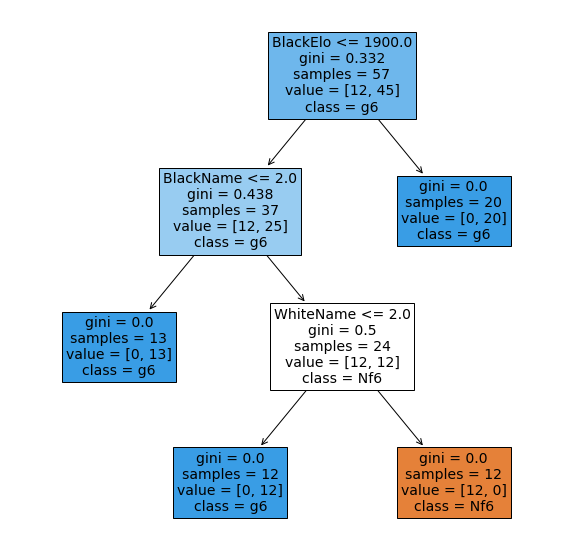

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# print the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


def train_decision_tree(df):
    # Handle missing values (if any)
    df.fillna('Unknown', inplace=True)

    # Encode categorical variables
    label_encoder = LabelEncoder()

    # Encode Result, WhiteName, and BlackName
    df['Result'] = label_encoder.fit_transform(df['Result'])
    # Print the encoding to understand it
    print("Result encoding:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


    # Define a custom encoding function
    def custom_encode(name, name_mapping, next_code):
        if name in name_mapping:
            return name_mapping[name]
        else:
            code = next_code[0]
            name_mapping[name] = code
            next_code[0] += 1
            return code

    # Initialize mapping and next_code for encoding
    name_mapping = {'Kramnik, Vladimir': 0, 'Nepomniachtchi, Ian': 1, "Kasparov, Garry": 2} # Warning: dataset specifici! Garry vs Gary, mistake in one of the experiments :( 
    next_code = [3]  # Start coding other names from 3

    # Apply the custom encoding function to WhiteName and BlackName
    df['WhiteName'] = df['WhiteName'].apply(custom_encode, args=(name_mapping, next_code))
    df['BlackName'] = df['BlackName'].apply(custom_encode, args=(name_mapping, next_code))

    # Print the encoding to understand it
    print("Custom encoding applied to WhiteName and BlackName")
    print(df[['WhiteName', 'BlackName']])
    print("Name mapping:", name_mapping)


    # Convert boolean columns to integers
    df['IncludeWhiteTitle'] = df['IncludeWhiteTitle'].astype(int)
    df['IncludeBlackTitle'] = df['IncludeBlackTitle'].astype(int)

    # Define feature columns and target column
    X = df[['Result', 'WhiteName', 'BlackName', 'WhiteElo', 'BlackElo', 'IncludeWhiteTitle', 'IncludeBlackTitle']]
    y = df['Move']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    print(classification_report(y_test, y_pred))



    # Plot the decision tree
    # plt.figure(figsize=(30, 30))  # Set the figure size
    plt.figure(figsize=(10, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, fontsize=14)
    plt.savefig('decision_tree_high_quality.png', dpi=300)  # Save the plot in high resolution
    plt.show()

train_decision_tree(df.copy().query('Result.notnull()'))

Result encoding: {'0-1': 0, '1-0': 1}
              precision    recall  f1-score   support

         Nf6       1.00      0.67      0.80         6
          g6       0.82      1.00      0.90         9

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15



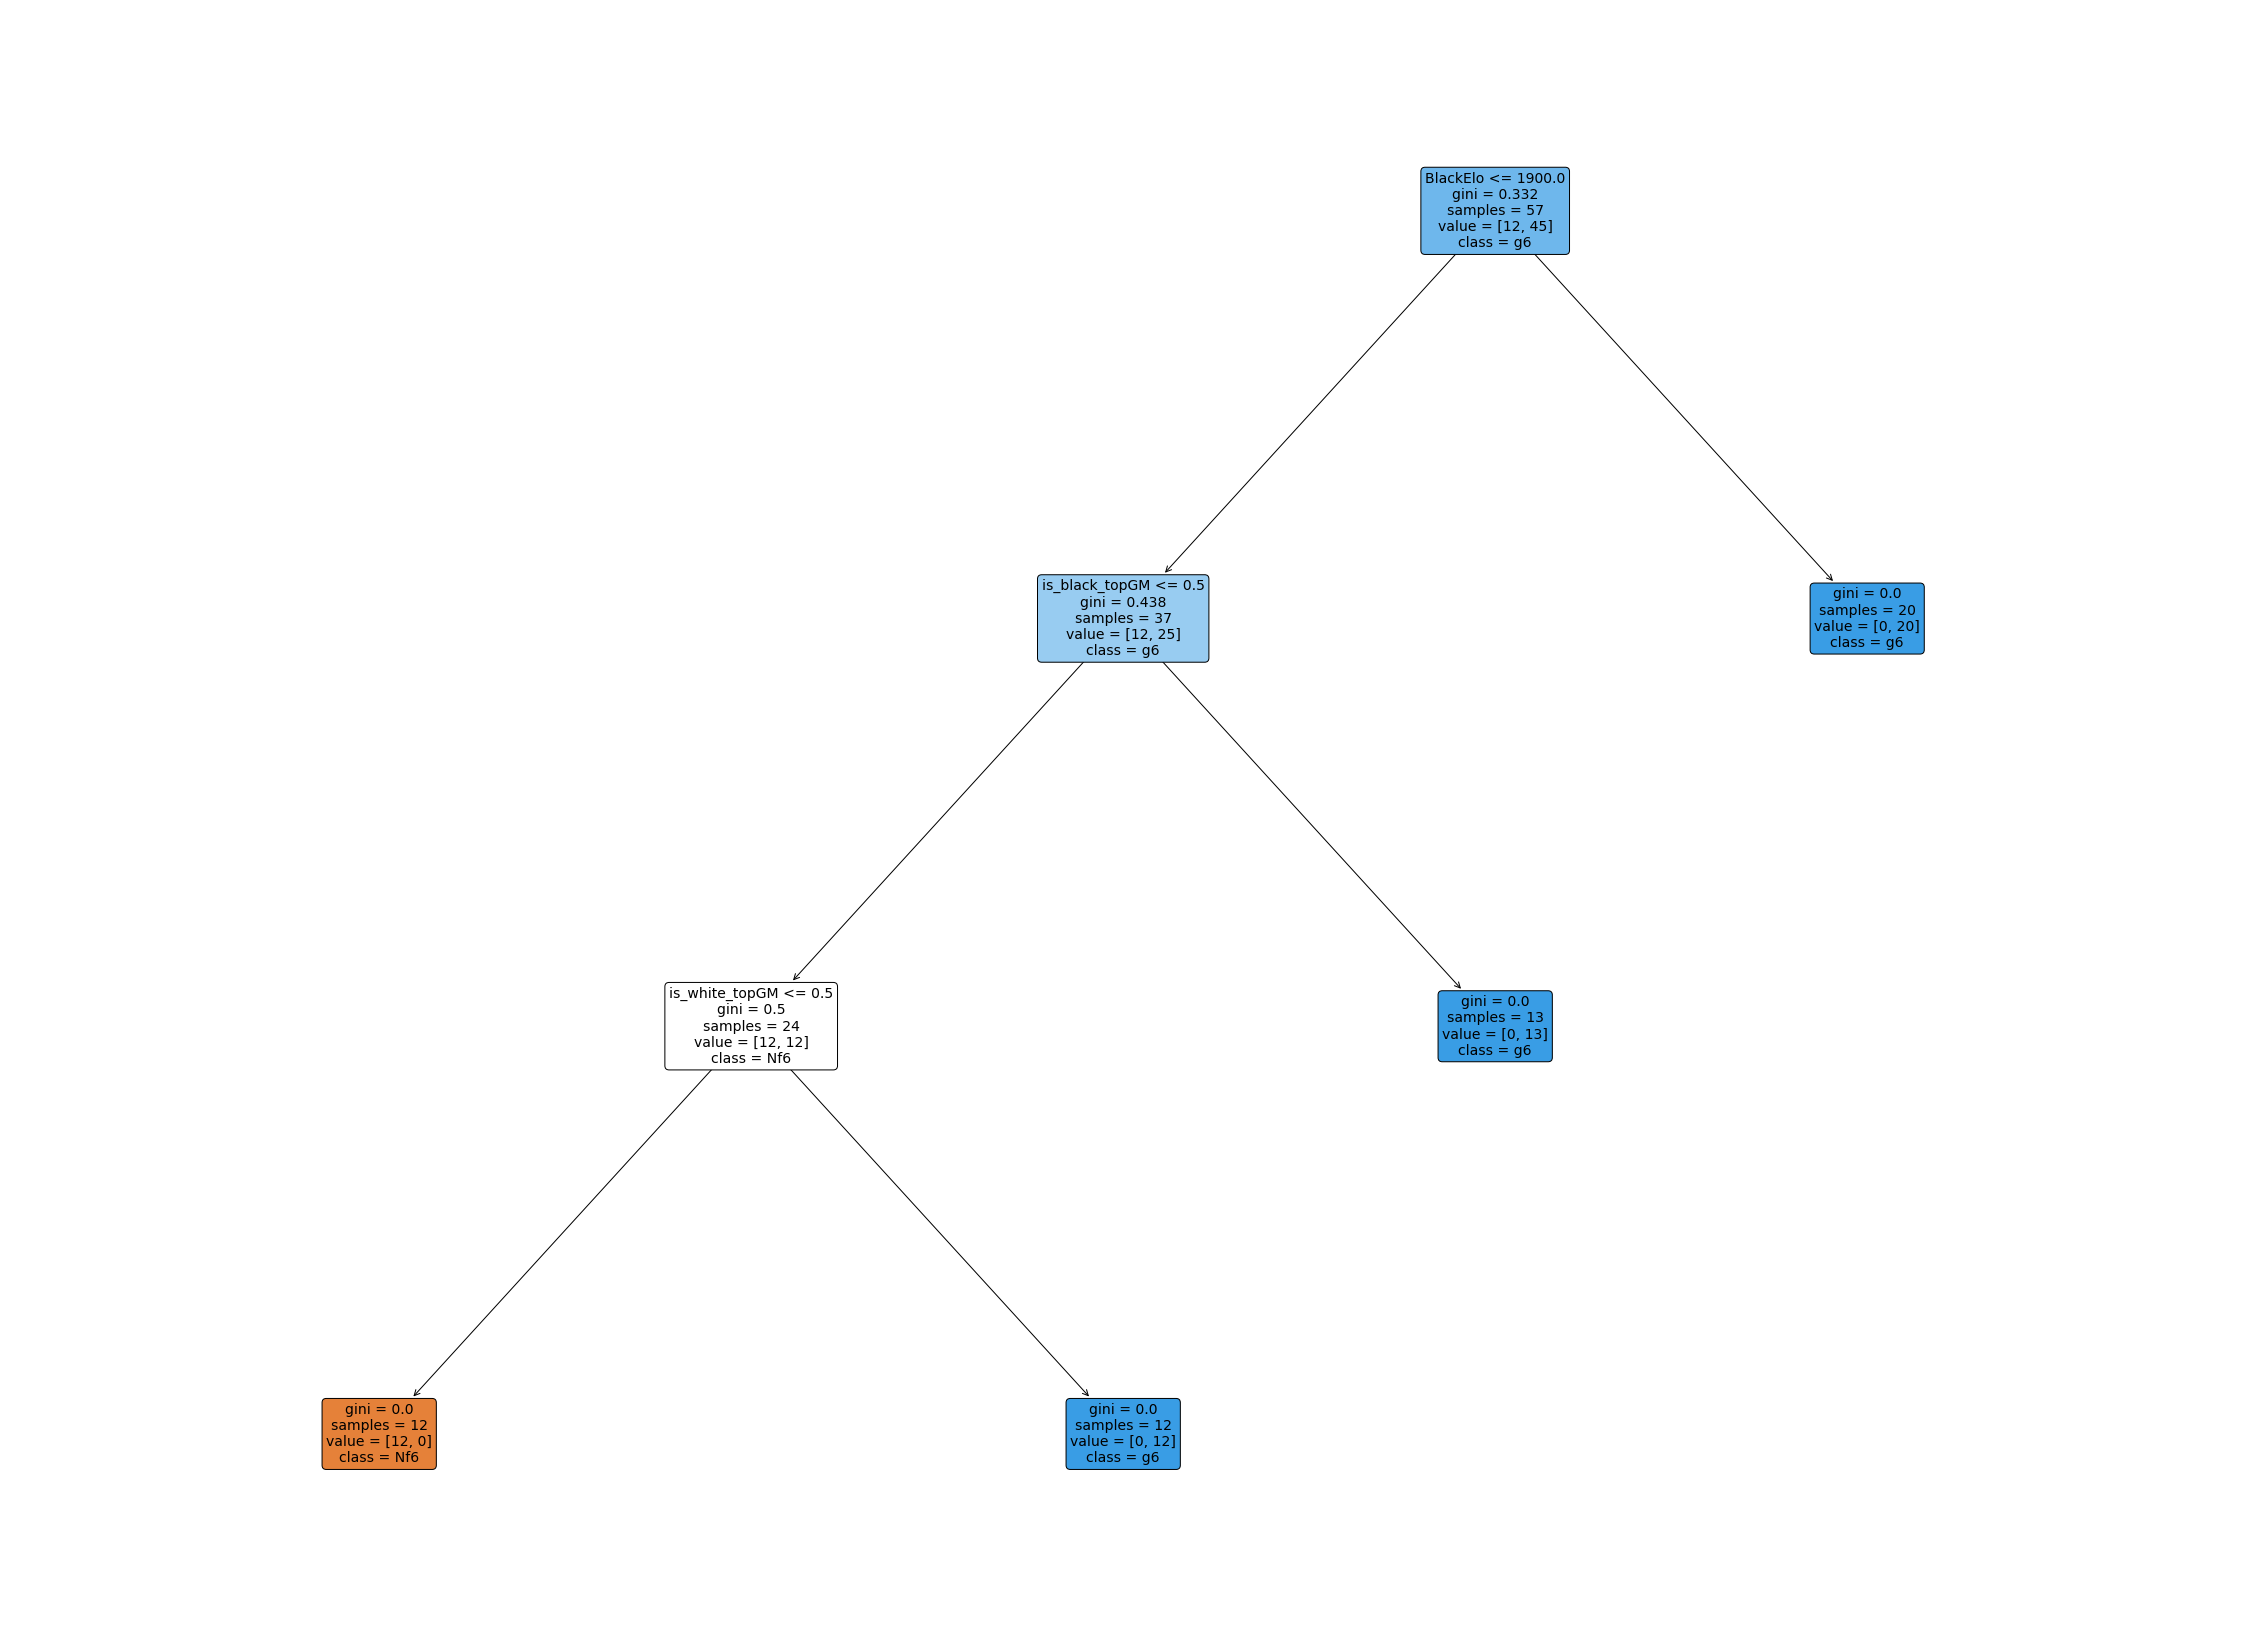

In [13]:
def train_decision_tree_withft_engineering(df):
    # Handle missing values (if any)
    df.fillna('Unknown', inplace=True)

    # Add is_white_topGM and is_black_topGM columns
    top_gm_names = ['Kramnik, Vladimir', 'Nepomniachtchi, Ian', 'Kasparov, Garry']
    df['is_white_topGM'] = df['WhiteName'].apply(lambda name: name in top_gm_names)
    df['is_black_topGM'] = df['BlackName'].apply(lambda name: name in top_gm_names)

    # Encode the boolean columns
    df['is_white_topGM'] = df['is_white_topGM'].astype(int)
    df['is_black_topGM'] = df['is_black_topGM'].astype(int)

    # Encode Result
    label_encoder = LabelEncoder()
    df['Result'] = label_encoder.fit_transform(df['Result'])

    # Print the encoding to understand it
    print("Result encoding:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

    # Convert boolean columns to integers
    df['IncludeWhiteTitle'] = df['IncludeWhiteTitle'].astype(int)
    df['IncludeBlackTitle'] = df['IncludeBlackTitle'].astype(int)

    # Define feature columns and target column
    X = df[['Result', 'WhiteElo', 'BlackElo', 'IncludeWhiteTitle', 'IncludeBlackTitle', 'is_white_topGM', 'is_black_topGM']]
    y = df['Move']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    print(classification_report(y_test, y_pred))

    # Plot the decision tree
    plt.figure(figsize=(40, 30))  # Set the figure size
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True, fontsize=14)
    plt.savefig('decision_tree_high_quality.png', dpi=300)  # Save the plot in high resolution
    plt.show()

train_decision_tree_withft_engineering(df.copy().query('Result.notnull()'))

In [14]:
df.sample(20)

,Result,WhiteName,BlackName,WhiteElo,BlackElo,IncludeWhiteTitle,IncludeBlackTitle,Move
32,1-0,"Louapre, David","Nepomniachtchi, Ian",2900,2900,False,False,g6
24,1-0,"Nepomniachtchi, Ian","Louapre, David",2000,2000,False,False,g6
13,1-0,"Nepomniachtchi, Ian",XXX,1700,1700,False,False,g6
23,1-0,XXX,"Louapre, David",1800,1800,False,False,Nf6
55,0-1,"Nepomniachtchi, Ian",XXX,1800,1800,False,False,g6
2,1-0,"Louapre, David","Nepomniachtchi, Ian",1000,1000,False,False,g6
40,0-1,XXX,"Nepomniachtchi, Ian",1000,1000,False,False,g6
12,1-0,"Nepomniachtchi, Ian","Louapre, David",1700,1700,False,False,g6
6,1-0,"Nepomniachtchi, Ian","Louapre, David",1400,1400,False,False,g6
39,0-1,"Louapre, David",XXX,1000,1000,False,False,Nf6
